<a href="https://colab.research.google.com/github/harshitha1406/Image-Classification/blob/main/Minor_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip Chairs.zip

Archive:  Chairs.zip
  inflating: Chairs/_1200______rocking-chair-bambou-1_15387.jpg  
  inflating: Chairs/1.jpg            
  inflating: Chairs/1000005680947-1000005680946_07-750.jpg  
  inflating: Chairs/121_2.jpg        
  inflating: Chairs/1580742487-resize.jpg  
  inflating: Chairs/1580748907-1970s-vintage-brass-italian-chiavari-chair-7011.jpg  
  inflating: Chairs/263672-1600x1030-identifying-antique-rocking-chairs.jpg  
  inflating: Chairs/61caOOcVz9L._SL1500_.jpg  
  inflating: Chairs/71HaD7ncUrL._SL1500_.jpg  
  inflating: Chairs/71KHrgsmC+L._SL1500_.jpg  
  inflating: Chairs/71lF0pr6B-L._SL1500_.jpg  
  inflating: Chairs/81J5r9dANGL._SL1500_.jpg  
  inflating: Chairs/81jY6WS-c2L._SL1500_.jpg  
  inflating: Chairs/Alston-Oak-Dining-Chair-64334-64283.jpg  
  inflating: Chairs/barrel-chair-1575497441.jpg  
  inflating: Chairs/C1P01-01.jpg     
  inflating: Chairs/chair_583020097_1000.jpg  
  inflating: Chairs/download.jpg     
  inflating: Chairs/executivedeluxe0.jpg  
  inflati

In [2]:
!unzip Fans.zip

Archive:  Fans.zip
  inflating: Fans/0040078-orient-fan-48-wendy-shine-all-colours.jpg  
  inflating: Fans/101_7054.jpg       
  inflating: Fans/12V-5010-Cooling-Fan-for-3D-Printer-2.jpg  
  inflating: Fans/24-inches-fans-500x500.jpg  
  inflating: Fans/4-Blade-Designer-Ceiling-Fan.jpg  
  inflating: Fans/51GsLIHbZxL._SL1500_.jpg  
  inflating: Fans/51h5QF82mTL._SL1200_.jpg  
  inflating: Fans/51QqXY279vL._SL1200_.jpg  
  inflating: Fans/52-5-blade-led-standard-ceiling-fan-with-remote-control-and-light-kit-included.jpg  
  inflating: Fans/610WX6ejdHL._SL1500_.jpg  
  inflating: Fans/61zUsIKkNqL._SX425_.jpg  
  inflating: Fans/719t2NyT8GL._AC_SL1500_.jpg  
  inflating: Fans/71Sm34rKnkL._SL1500_.jpg  
  inflating: Fans/BLDC-fan-2.jpg     
  inflating: Fans/categorie-img-10.jpg  
  inflating: Fans/clean-fan-today-tease-170717_9c5ce55d4af72fa51c7cc4a25845ec3f.social_share_1024x512_center.jpg  
  inflating: Fans/efdQC9CnnszTN.jpg  
  inflating: Fans/electric-table-fan-500x500.jpg  
  inflat

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
flat_data=[]

DATADIR='/content'
CATEGORIES=['Chairs','Fans']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target) 

In [4]:
flat_data[0]

array([0.75686275, 0.79215686, 0.78039216, ..., 0.65294118, 0.71176471,
       0.72352941])

In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=None,random_state=123)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [99]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [100]:
accuracy_score(y_pred,y_test)

0.8461538461538461

In [101]:
confusion_matrix(y_pred,y_test)

array([[6, 0],
       [2, 5]])

In [102]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [103]:
model=pickle.load(open('img_model.p','rb'))

Enter your URLhttps://hips.hearstapps.com/vader-prod.s3.amazonaws.com/1580742487-resize.jpg?crop=1xw:1xh;center,top&resize=480:*
(480, 480, 3)
PREDICTED OUTPUT : Chairs


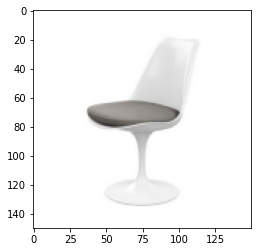

In [107]:
flat_data=[]
url=input('Enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')